# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Channel and region seems the columns of kind of store and geographical region
# The others are the type of product buyed

# no categorical data

In [5]:
# no missing data
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

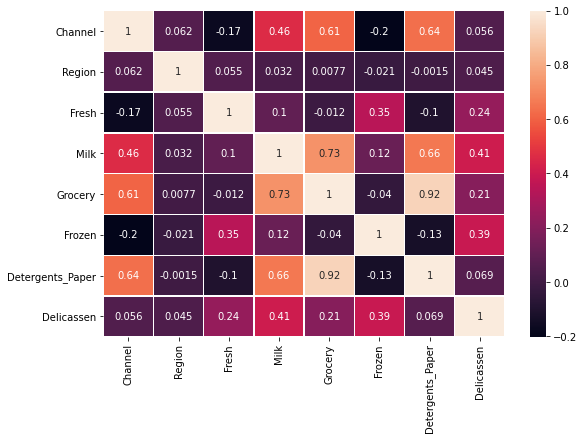

In [6]:
# There is a high correlation between "Detergents_Paper" and "Grocery"
# There is a hi consideble correlation between "Milk" and "Grocery"
# There is a considerable correlation between "Detergents_Paper" and "Channel"
# There is a considerable correlation between "Detergents_Paper" and "Milk"
# There is a considerable correlation between "Channel" and "Milk"

import matplotlib.pyplot as plt
import seaborn as sns

corr=customers.corr()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True,  linewidths=.5, ax=ax)


In [7]:
# Descriptive statistics - any outliers to remove?
# There are ouliers in all columns except "Channel" and "Region"

customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


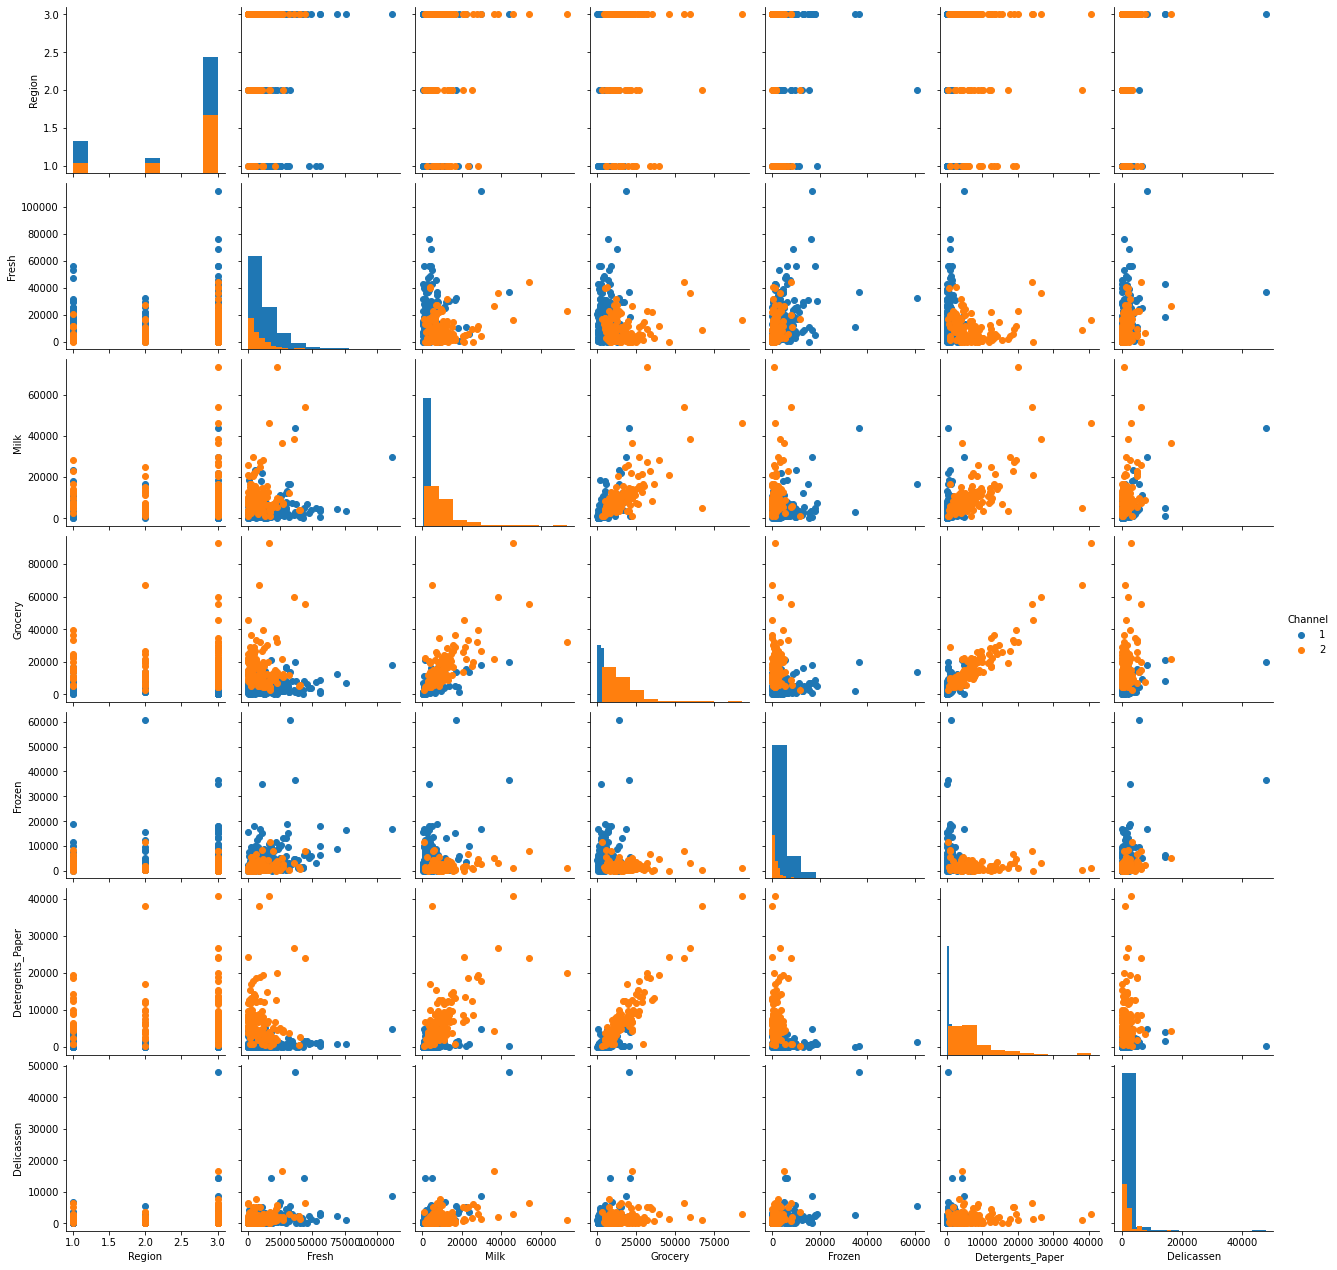

In [8]:
# Column-wise data distribution - is the distribution skewed?
# Yes all distributions (except "Channel" and "Region") seems skewed
g = sns.PairGrid(customers, hue="Channel")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
# take out the most correlated column
customers_filtered=customers.drop(columns=['Detergents_Paper'])

In [10]:
# take out the outlayer... 
cols=customers_filtered.columns[2:]

for col in cols:
    customers_filtered[col]=customers_filtered[col][customers_filtered[col]<customers_filtered[col].quantile(0.98)]

customers_filtered.isna().sum()

Channel       0
Region        0
Fresh         9
Milk          9
Grocery       9
Frozen        9
Delicassen    9
dtype: int64

In [11]:
customers_filtered=customers_filtered.dropna()

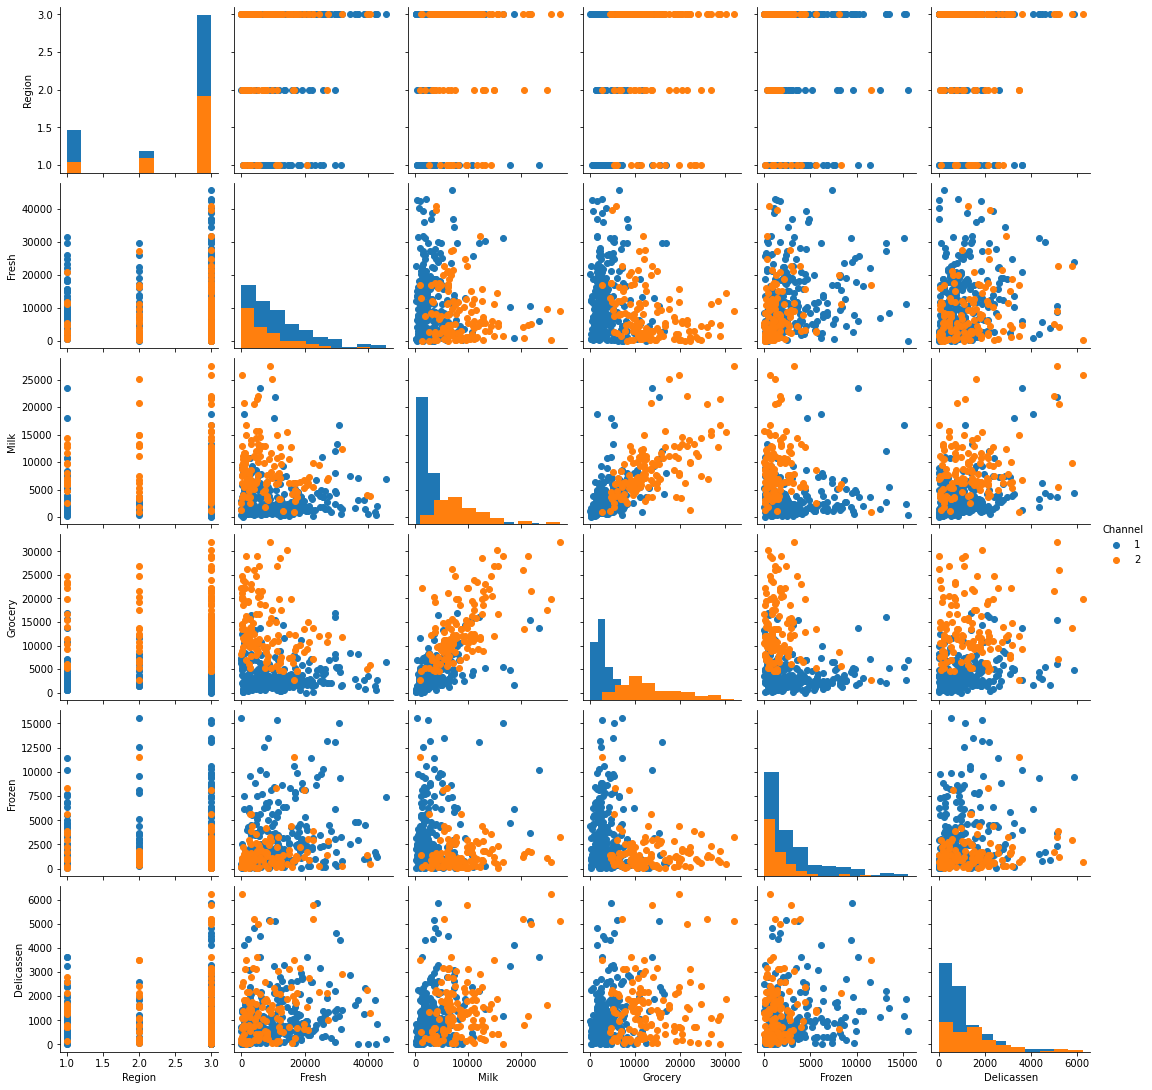

In [12]:
# Column-wise data distribution - is the distribution skewed?
# Yes all distributions (except "Channel" and "Region") seems skewed
g = sns.PairGrid(customers_filtered, hue="Channel")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [13]:
# because of the distributions skewed we would like to transform them

import numpy as np
cols=customers_filtered.columns[2:]
for col in cols:
    customers_filtered[col]=customers_filtered[col].apply(np.log)
    
customers_filtered.isna().sum()

Channel       0
Region        0
Fresh         0
Milk          0
Grocery       0
Frozen        0
Delicassen    0
dtype: int64

In [14]:
customers_filtered.dropna()
customers_filtered.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,1.313725,2.556373,8.658885,8.043075,8.361795,7.222890,6.558408
std,0.464576,0.762615,1.426395,1.028810,1.068370,1.200679,1.264757
min,1.000000,1.000000,1.098612,4.007333,1.098612,3.218876,1.098612
25%,1.000000,2.000000,8.025596,7.294029,7.655035,6.510255,5.978886
50%,1.000000,3.000000,8.981118,8.139891,8.418035,7.265058,6.743975
75%,2.000000,3.000000,9.654449,8.820766,9.188836,8.055951,7.407620
max,2.000000,3.000000,10.728540,10.220923,10.374553,9.655090,8.740337


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_scale=scaler.fit_transform(customers_filtered)


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [16]:
# Your code here:
from sklearn.cluster import KMeans

model = KMeans()

labels = model.fit_predict(customer_scale)

customers_filtered["label"] = labels
customers_filtered.head()
customers["labels"]=customers_filtered['label']

Count the values in `labels`.

In [17]:
# Your code here:
customers.labels.value_counts()

1.0    75
2.0    69
6.0    69
5.0    67
0.0    60
3.0    49
4.0    19
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [18]:
# Your code here
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.5)
cluster_bd = model.fit_predict(customer_scale)
customers_filtered['labels_DBSCAN']=cluster_bd
customers["labels_DBSCAN"]=customers_filtered['labels_DBSCAN']

Count the values in `labels_DBSCAN`.

In [19]:
# Your code here
customers.labels_DBSCAN.value_counts()

-1.0    402
 0.0      6
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

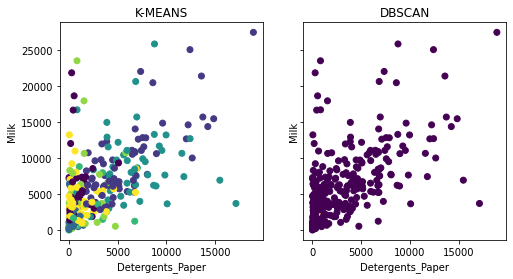

In [20]:
# Your code here:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(8, 4), sharey=True)
x=customers['Detergents_Paper']
y=customers['Milk']
s0=customers['labels']
s1=customers['labels_DBSCAN']

ax[0].scatter(x, y, c=s0)
ax[0].set_title('K-MEANS')
ax[0].set_ylabel('Milk')
ax[0].set_xlabel('Detergents_Paper')

ax[1].scatter(x, y, c=s1)
ax[1].set_title('DBSCAN')
ax[1].set_ylabel('Milk')
ax[1].set_xlabel('Detergents_Paper')
plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

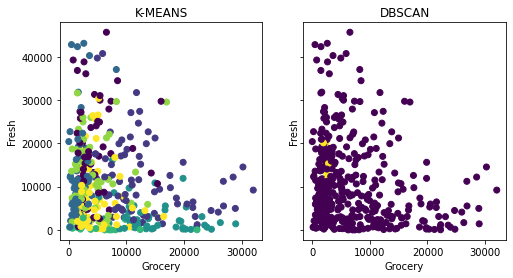

In [21]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(8, 4), sharey=True)
x=customers['Grocery']
y=customers['Fresh']
s0=customers['labels']
s1=customers['labels_DBSCAN']

ax[0].scatter(x, y, c=s0)
ax[0].set_title('K-MEANS')
ax[0].set_ylabel('Fresh')
ax[0].set_xlabel('Grocery')

ax[1].scatter(x, y, c=s1)
ax[1].set_title('DBSCAN')
ax[1].set_ylabel('Fresh')
ax[1].set_xlabel('Grocery')
plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

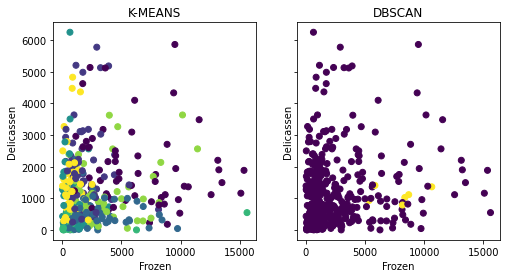

In [22]:
# Your code here:
fig, ax = plt.subplots(1,2,figsize=(8, 4), sharey=True)
x=customers['Frozen']
y=customers['Delicassen']
s0=customers['labels']
s1=customers['labels_DBSCAN']

ax[0].scatter(x, y, c=s0)
ax[0].set_title('K-MEANS')
ax[0].set_ylabel('Delicassen')
ax[0].set_xlabel('Frozen')

ax[1].scatter(x, y, c=s1)
ax[1].set_title('DBSCAN')
ax[1].set_ylabel('Delicassen')
ax[1].set_xlabel('Frozen')

plt.show()

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [23]:
# Your code here:
display(customers.groupby(['labels']).mean())
customers.groupby(['labels_DBSCAN']).mean()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN
labels,,,,,,,,,
0.0,1.016667,2.916667,17893.166667,4502.450000,4437.800000,6299.366667,757.700000,1963.933333,-0.9
1.0,2.000000,2.853333,11773.680000,9003.213333,13137.120000,1830.626667,5624.826667,1812.320000,-1.0
2.0,1.000000,2.956522,12896.753623,1475.884058,1776.710145,2824.637681,330.797101,513.318841,-1.0
3.0,1.979592,2.346939,3025.979592,9047.734694,14891.285714,720.653061,6805.795918,935.755102,-1.0
4.0,1.105263,2.631579,564.368421,2181.526316,5193.052632,1476.263158,1303.210526,161.842105,-1.0
5.0,1.029851,1.208955,11220.000000,3257.686567,4030.880597,2952.522388,829.865672,1057.746269,-1.0
6.0,1.000000,2.956522,7643.594203,3632.260870,4414.608696,733.652174,1069.826087,1150.231884,-1.0


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,
-1.0,1.318408,2.549751,10417.850746,4945.042289,6870.047264,2425.141791,2426.077114,1198.258706,2.947761
0.0,1.000000,3.000000,16110.000000,2166.000000,2567.333333,7842.333333,421.666667,1106.833333,0.000000


Which algorithm appears to perform better?

In [30]:
# I have proved with data and log(data), and Kmeans appear to perform better, both cases. 
# Also, DB_SCAN seems perform worse with log(data), with data it produce 3 cluster, and 2 with log(data) 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

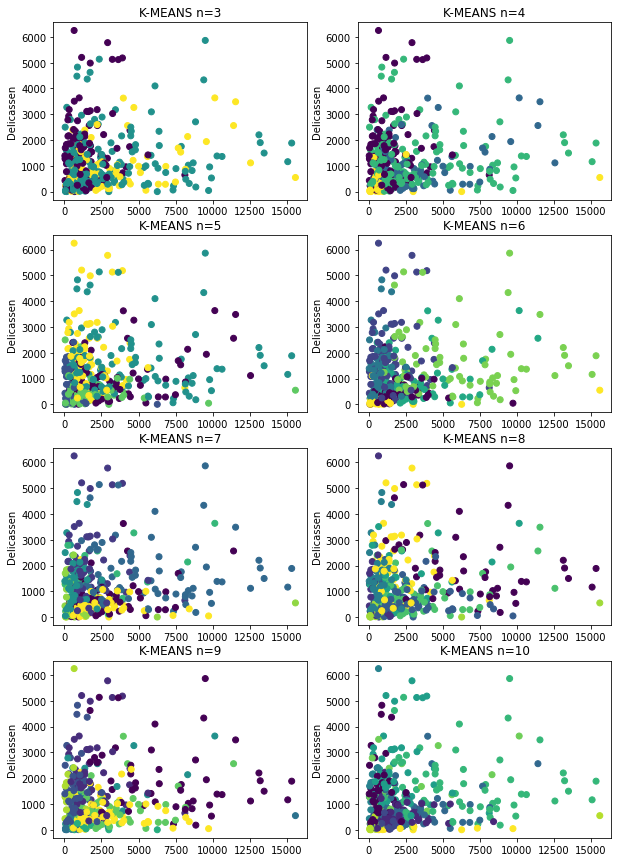

In [51]:
# Your code here
import matplotlib.pyplot as plt

for cluster in range(3,11,1):
    model = KMeans(n_clusters=cluster)
    labels = model.fit_predict(customer_scale)
    customers_filtered["label"] = labels
    customers["labels_"+str(cluster)]=customers_filtered['label']
    
fig = plt.figure(figsize=(10, 15))

for cluster in range(3,11,1):
    x=customers['Frozen']
    y=customers['Delicassen']
    s=customers['labels_'+str(cluster)]
    k=cluster-2
    ax1 = fig.add_subplot(4, 2, k)
    ax1.scatter(x, y, c=s)
    ax1.set_title('K-MEANS n='+ str(cluster))
    ax1.set_ylabel('Delicassen')
  

plt.show()


In [58]:
# Your comment here
# Because of the distribution and the quantity of data I consider dificult to say just ckecking the graph
# which are the best number of cluster...  I dare to say that n=6 could be a good number because
# it seems to separate properly the data putting appart the green ones

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [59]:
customers_filtered.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen',
       'label', 'labels_DBSCAN', 'labels_DBSCAN_0.3_3'],
      dtype='object')

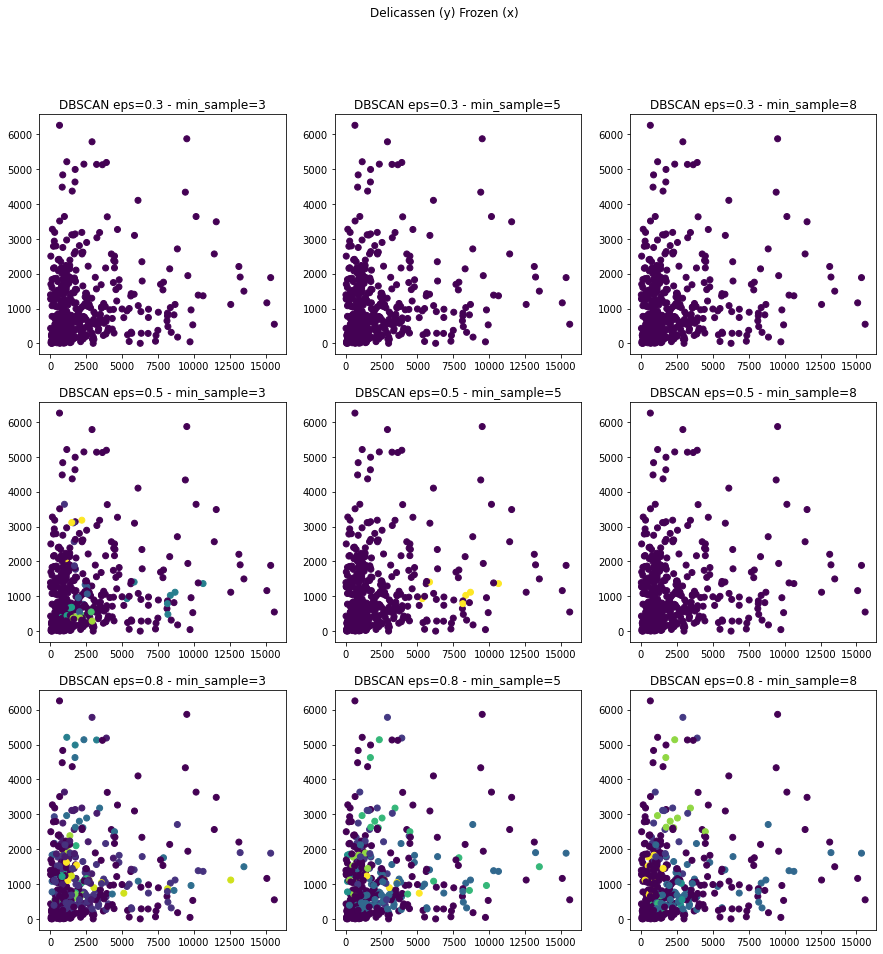

In [65]:
# Your code here
epss=[0.3,0.5,0.8]
min_samples=[3,5,8]
for ep in epss:
    for min_sam in min_samples:
        model=DBSCAN(eps=ep,min_samples=min_sam)
        cluster_bd = model.fit_predict(customer_scale)
        customers_filtered['labels_DBSCAN_'+str(ep)+'_'+str(min_sam)]=cluster_bd
        customers['labels_DBSCAN_'+str(ep)+'_'+str(min_sam)]=customers_filtered['labels_DBSCAN_'+str(ep)+'_'+str(min_sam)]
        

fig = plt.figure(figsize=(15, 15))
k=1
epss=[0.3,0.5,0.8]
min_samples=[3,5,8]
for eps in epss:
    for min_sam in min_samples:
        x=customers['Frozen']
        y=customers['Delicassen']
        s=customers['labels_DBSCAN_'+str(eps)+'_'+str(min_sam)]
        ax1 = fig.add_subplot(3, 3, k)
        ax1.scatter(x, y, c=s)
        ax1.set_title('DBSCAN eps='+ str(eps) + ' - min_sample='+str(min_sam))
        k+=1
        
        
fig.suptitle('Delicassen (y) Frozen (x)')
plt.show()

In [28]:
# Your comment here
# In this case, DB_SCAN get better results or at least present more cluster when eps increase
# and min_samples seems to increase this effect.